# **MLE FOR WEIBULL**
*******************************

# **Cài đặt thư viện và biểu diễn dữ liệu**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from the CSV file
file_path = 'D:/Code ĐA2/Data/ai4i2020.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

(None,
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
 0    1     M14860    M                298.1                    308.6   
 1    2     L47181    L                298.2                    308.7   
 2    3     L47182    L                298.1                    308.5   
 3    4     L47183    L                298.2                    308.6   
 4    5     L47184    L                298.2                    308.7   
 
    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
 0                    1551         42.8                0                0    0   
 1                    1408         46.3                3                0    0   
 2                    1498         49.4                5                0    0   
 3                    1433         39.5                7                0    0   
 4                    1408         40.0                9                0    0   
 
    HDF  PWF  OSF  RNF  
 0    0    0    0    0  
 1    0  

In [2]:
import pandas as pd

# Assume df is your DataFrame and 'Tool wear [min]' is the column you want to check
count_zeros = (df['Tool wear [min]'] == 0).sum()

# Print the result
print(f"Number of elements equal to 0 in the 'Tool wear [min]' column: {count_zeros}")

# Remove rows where the value is 0 in the 'Tool wear [min]' column
df = df[df['Tool wear [min]'] != 0]

# Print the DataFrame after removal
print("DataFrame after removing rows with 0 values in the 'Tool wear [min]' column:")
print(df)



Number of elements equal to 0 in the 'Tool wear [min]' column: 120
DataFrame after removing rows with 0 values in the 'Tool wear [min]' column:
        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
5         6     M14865    M                298.1                    308.6   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  100

# **Tính toán giá trị tham số**

In [3]:
pip install numpy scipy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from scipy.optimize import minimize

In [5]:
data = df['Tool wear [min]'].values  # Observation times
events = df['Machine failure'].values  # Event indicator variable (1: event occurred, 0: censored)

# Log-likelihood function for the Weibull distribution
def weibull_log_likelihood(params, data, events):
    lambda_, p = params
    log_likelihood = 0
    
    if lambda_ <= 0:  # Check if lambda is valid
        return -np.inf  # Return -inf if lambda is invalid

    for i in range(len(data)):
        if data[i] <= 0:  # Skip invalid values
            continue

        if events[i] == 1:  # Event occurred
            log_likelihood += (np.log(p) + np.log(lambda_) + 
                               (p - 1) * np.log(lambda_ * data[i]) - 
                               (lambda_ * data[i]) ** p)
        else:  # Event did not occur (censored)
            log_likelihood -= (lambda_ * data[i]) ** p

    return log_likelihood

# Negative log-likelihood function for the Weibull distribution
def weibull_negative_log_likelihood(params, data, events):
    return -weibull_log_likelihood(params, data, events)  # Return negative log-likelihood

# Initial parameters
initial_params = [1.0, 5.0]  # [lambda, p] with reasonable positive initial values

# Use minimize to find the optimal parameters
result = minimize(weibull_negative_log_likelihood, initial_params, args=(data, events), 
                  bounds=((1e-5, None), (1e-5, None)), method='L-BFGS-B')

# Extract the estimated parameters
lambda_est, p_est = result.x
#print(f'Initial parameters: \n(lambda,p): {initial_params}')
print(f'Estimated Weibull parameters:\nScale (lambda): {lambda_est}\nShape (p): {p_est}')


Estimated Weibull parameters:
Scale (lambda): 0.002051171308980882
Shape (p): 2.61200243085315


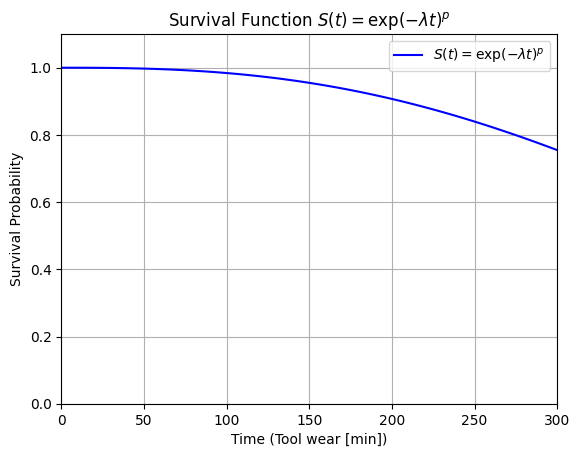

In [6]:

# Generate values of t from 0 to 500
t_values = np.linspace(0, 300, 100)
# Calculate S(t) = exp(-lambda * t)^p
S_t_values = np.exp(-(lambda_est * t_values) ** p_est)

# Plot the survival function S(t)
plt.plot(t_values, S_t_values, 'b-', label=r'$S(t) = \exp(-\lambda t)^p$')
plt.title(r'Survival Function $S(t) = \exp(-\lambda t)^p$')
plt.xlabel('Time (Tool wear [min])')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.1)
plt.xlim(0, 300)
plt.legend()
plt.grid(True)
plt.show()
